# Projet Bloc 2 : Speed dating

 Objectif : Déterminer se qui pousse des individus à avoir un match lors des quatre premières minutes? On va voir l'influence de l'origine ethnique, de l'age, du mode de vie, du genre?

## 1) Nettoyage de notre dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
pio.renderers.default = "iframe_connected"
from plotly.subplots import make_subplots



In [2]:
speed_dating1 = pd.read_csv("Speed Dating Data.csv", encoding= "latin-1")
speed_dating1

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


### 1-a) Détection des valeurs manquantes dans notre tableau

In [3]:
dico_isnull1 = {c : len(speed_dating1[speed_dating1[c].isnull()== True]) for c in speed_dating1.columns}
dico_isnull1

{'iid': 0,
 'id': 1,
 'gender': 0,
 'idg': 0,
 'condtn': 0,
 'wave': 0,
 'round': 0,
 'position': 0,
 'positin1': 1846,
 'order': 0,
 'partner': 0,
 'pid': 10,
 'match': 0,
 'int_corr': 158,
 'samerace': 0,
 'age_o': 104,
 'race_o': 73,
 'pf_o_att': 89,
 'pf_o_sin': 89,
 'pf_o_int': 89,
 'pf_o_fun': 98,
 'pf_o_amb': 107,
 'pf_o_sha': 129,
 'dec_o': 0,
 'attr_o': 212,
 'sinc_o': 287,
 'intel_o': 306,
 'fun_o': 360,
 'amb_o': 722,
 'shar_o': 1076,
 'like_o': 250,
 'prob_o': 318,
 'met_o': 385,
 'age': 95,
 'field': 63,
 'field_cd': 82,
 'undergra': 3464,
 'mn_sat': 5245,
 'tuition': 4795,
 'race': 63,
 'imprace': 79,
 'imprelig': 79,
 'from': 79,
 'zipcode': 1064,
 'income': 4099,
 'goal': 79,
 'date': 97,
 'go_out': 79,
 'career': 89,
 'career_c': 138,
 'sports': 79,
 'tvsports': 79,
 'exercise': 79,
 'dining': 79,
 'museums': 79,
 'art': 79,
 'hiking': 79,
 'gaming': 79,
 'clubbing': 79,
 'reading': 79,
 'tv': 79,
 'theater': 79,
 'movies': 79,
 'concerts': 79,
 'music': 79,
 'shopping

In [4]:
dico_isnull = {c : (len(speed_dating1[speed_dating1[c].isnull()== True])/(speed_dating1.shape[0])) * 100 for c in speed_dating1.columns}
dico_isnull

{'iid': 0.0,
 'id': 0.011936022917164,
 'gender': 0.0,
 'idg': 0.0,
 'condtn': 0.0,
 'wave': 0.0,
 'round': 0.0,
 'position': 0.0,
 'positin1': 22.033898305084744,
 'order': 0.0,
 'partner': 0.0,
 'pid': 0.11936022917164002,
 'match': 0.0,
 'int_corr': 1.885891620911912,
 'samerace': 0.0,
 'age_o': 1.2413463833850562,
 'race_o': 0.871329672952972,
 'pf_o_att': 1.062306039627596,
 'pf_o_sin': 1.062306039627596,
 'pf_o_int': 1.062306039627596,
 'pf_o_fun': 1.169730245882072,
 'pf_o_amb': 1.277154452136548,
 'pf_o_sha': 1.5397469563141561,
 'dec_o': 0.0,
 'attr_o': 2.530436858438768,
 'sinc_o': 3.425638577226068,
 'intel_o': 3.652423012652185,
 'fun_o': 4.296968250179041,
 'amb_o': 8.617808546192409,
 'shar_o': 12.843160658868467,
 'like_o': 2.9840057292910003,
 'prob_o': 3.795655287658152,
 'met_o': 4.59536882310814,
 'age': 1.13392217713058,
 'field': 0.751969443781332,
 'field_cd': 0.978753879207448,
 'undergra': 41.3463833850561,
 'mn_sat': 62.60444020052518,
 'tuition': 57.2332298878

### 1-b) Sélection des variables (features)

In [5]:
liste_variables =  [k for k, v in dico_isnull.items() if v <40 ] # on ne met dans la liste que les variables qui ont pourcentage de valeurs manquantes strictement inférieure à 40 %
liste_variables

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'dec',
 'attr',
 'sinc'

In [6]:
speed_dating2 = speed_dating1[liste_variables]
speed_dating2

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0


#### Traitement des fréquences des sorties

In [7]:
def output_frequency(x):
    
    if x == 1.0:
        x= "Several times a week"
        return x
    
    elif x == 2.0:
        x= "Twice a week"
        return x
    
    elif x == 3.0:
        x= "Once a week"
        return x
    
    elif x == 4.0:
        x= "Twice a month"
        return x
    
    elif x == 5.0:
        x= "Once a month"
        return x
    
    elif x == 6.0:
        x= "Several times a year"
        return x
    
    elif x == 7.0:
        x= "Almost never"
        return x
    
    else: 
        x = "No reponse"
        return x

In [8]:
speed_dating2["go_out"] =speed_dating2["go_out"].apply(lambda x : output_frequency(x))
speed_dating2["go_out"]

/tmp/ipykernel_270/1600877449.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       Several times a week
1       Several times a week
2       Several times a week
3       Several times a week
4       Several times a week
                ...         
8373    Several times a week
8374    Several times a week
8375    Several times a week
8376    Several times a week
8377    Several times a week
Name: go_out, Length: 8378, dtype: object

In [9]:
speed_dating2["go_out"].value_counts()

Twice a week            2990
Several times a week    2610
Once a week             1949
Twice a month            450
Once a month             164
Several times a year      99
No reponse                79
Almost never              37
Name: go_out, dtype: int64

#### Traitement des origines ethniques

In [10]:
def race(x):
    
    if x == 1.0:
        x= "Black/African American"
        return x
    
    elif x == 2.0:
        x= "European/Caucasian-American"
        return x
    
    elif x == 3.0:
        x= "Latino/Hispanic American"
        return x
    
    elif x == 4.0:
        x= "Asian/Pacific Islander/Asian-American"
        return x
    
    elif x == 5.0:
        x= "Native American"
        return x
    
    elif x == 6.0:
        x= "Other"
        return x
    
    else: 
        x = "No reponse"
        return x

In [11]:
speed_dating2["race"] =speed_dating2["race"].apply(lambda x : race(x))
speed_dating2["race_o"] =speed_dating2["race_o"].apply(lambda x : race(x))

/tmp/ipykernel_270/3400129275.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_270/3400129275.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
speed_dating2["race"].value_counts(dropna = False)

European/Caucasian-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     522
Black/African American                    420
No reponse                                 63
Name: race, dtype: int64

#### Séparation des variables  qui ont des valeurs manquantes ou pas

In [13]:
liste_variable_pas_manquant = [valeur for valeur in speed_dating2.columns if (speed_dating2[valeur].isnull().any()== False)]
liste_variable_pas_manquant

['iid',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'order',
 'partner',
 'match',
 'samerace',
 'race_o',
 'dec_o',
 'race',
 'go_out',
 'dec']

In [14]:
liste_variable_manquant = [valeur for valeur in speed_dating2.columns if (speed_dating2[valeur].isnull().any()== True)]
liste_variable_manquant

['id',
 'positin1',
 'pid',
 'int_corr',
 'age_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'goal',
 'date',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'match_es',
 'satis_2',
 'length',
 'numdat_2',
 'attr1_2',
 'sinc1_2',
 'intel1_2',
 'fun1_2',
 'am

In [15]:
selection = ['age_o','age','imprace','attr','sinc','intel','fun', 'amb','shar','like','prob','met','imprelig']
liste_final = liste_variable_pas_manquant + selection
liste_final

['iid',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'order',
 'partner',
 'match',
 'samerace',
 'race_o',
 'dec_o',
 'race',
 'go_out',
 'dec',
 'age_o',
 'age',
 'imprace',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'imprelig']

In [16]:
speed_dating3 = speed_dating2[liste_final]
speed_dating3 

,iid,gender,idg,condtn,wave,round,position,order,partner,match,...,attr,sinc,intel,fun,amb,shar,like,prob,met,imprelig
0,1,0,1,1,1,10,7,4,1,0,...,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,1,0,1,1,1,10,7,3,2,0,...,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
2,1,0,1,1,1,10,7,10,3,1,...,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0
3,1,0,1,1,1,10,7,5,4,1,...,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,1,0,1,1,1,10,7,7,5,1,...,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,44,2,21,22,14,5,18,0,...,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,1.0
8374,552,1,44,2,21,22,13,4,19,0,...,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,1.0
8375,552,1,44,2,21,22,19,10,20,0,...,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,1.0
8376,552,1,44,2,21,22,3,16,21,0,...,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,1.0


In [17]:
dico_isnull3 = {c : (len(speed_dating3[speed_dating3[c].isnull()== True])/(speed_dating3.shape[0])) * 100 for c in speed_dating3.columns}
dico_isnull3

{'iid': 0.0,
 'gender': 0.0,
 'idg': 0.0,
 'condtn': 0.0,
 'wave': 0.0,
 'round': 0.0,
 'position': 0.0,
 'order': 0.0,
 'partner': 0.0,
 'match': 0.0,
 'samerace': 0.0,
 'race_o': 0.0,
 'dec_o': 0.0,
 'race': 0.0,
 'go_out': 0.0,
 'dec': 0.0,
 'age_o': 1.2413463833850562,
 'age': 1.13392217713058,
 'imprace': 0.942945810455956,
 'attr': 2.411076629267128,
 'sinc': 3.306278348054428,
 'intel': 3.533062783480544,
 'fun': 4.1776080210074,
 'amb': 8.498448317020769,
 'shar': 12.735736452613988,
 'like': 2.86464550011936,
 'prob': 3.6882310814036763,
 'met': 4.4760085939365,
 'imprelig': 0.942945810455956}

#### Traitement des valeurs manquantes

In [18]:
no_match1 =speed_dating3[speed_dating3["match"]==0]

In [19]:
no_match1.imprace.value_counts(dropna= False)

1.0     2280
3.0      812
2.0      795
8.0      597
5.0      557
7.0      469
6.0      443
4.0      424
9.0      331
10.0     219
NaN       64
0.0        7
Name: imprace, dtype: int64

In [20]:
match1 = speed_dating3[speed_dating3["match"]==1]
match1.gender.value_counts()

0    690
1    690
Name: gender, dtype: int64

In [21]:
match1

,iid,gender,idg,condtn,wave,round,position,order,partner,match,...,attr,sinc,intel,fun,amb,shar,like,prob,met,imprelig
2,1,0,1,1,1,10,7,10,3,1,...,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0
3,1,0,1,1,1,10,7,5,4,1,...,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,1,0,1,1,1,10,7,7,5,1,...,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
8,1,0,1,1,1,10,7,8,9,1,...,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0,4.0
13,2,0,3,1,1,10,3,1,4,1,...,7.0,9.0,7.0,6.0,5.0,7.0,7.0,8.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,552,1,44,2,21,22,12,3,2,1,...,9.0,9.0,9.0,9.0,NaN,7.0,9.0,8.0,0.0,1.0
8360,552,1,44,2,21,22,22,13,5,1,...,8.0,9.0,9.0,9.0,6.0,8.0,9.0,6.0,NaN,1.0
8362,552,1,44,2,21,22,10,1,7,1,...,7.0,NaN,5.0,5.0,5.0,4.0,8.0,7.0,0.0,1.0
8363,552,1,44,2,21,22,18,9,8,1,...,8.0,7.0,8.0,9.0,8.0,8.0,8.0,6.0,0.0,1.0


In [22]:
def missing_value_replace(data,name_columns):
    data[name_columns]= data[name_columns].fillna(data[name_columns].median()) 
    return data[name_columns]


# fonction qui va permettre de remplacer les valeurs manquantes d'une colonne par la médiane de celle-ci.

In [23]:
missing_value_replace(match1,"attr")
missing_value_replace(match1,"like")
missing_value_replace(match1,"intel")
missing_value_replace(match1,"sinc")
missing_value_replace(match1,"imprace")
missing_value_replace(match1,"fun")
missing_value_replace(match1,"age")
missing_value_replace(match1,"age_o")
missing_value_replace(match1,"amb")
missing_value_replace(match1,"shar")
missing_value_replace(match1,"prob")
missing_value_replace(match1,"met")
missing_value_replace(match1,"imprelig")

/tmp/ipykernel_270/2148814793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2       4.0
3       4.0
4       4.0
8       4.0
13      5.0
       ... 
8357    1.0
8360    1.0
8362    1.0
8363    1.0
8371    1.0
Name: imprelig, Length: 1380, dtype: float64

In [24]:
missing_value_replace(no_match1,"attr")
missing_value_replace(no_match1,"like")
missing_value_replace(no_match1,"intel")
missing_value_replace(no_match1,"sinc")
missing_value_replace(no_match1,"imprace")
missing_value_replace(no_match1,"fun")
missing_value_replace(no_match1,"age")
missing_value_replace(no_match1,"age_o")
missing_value_replace(no_match1,"amb")
missing_value_replace(no_match1,"shar")
missing_value_replace(no_match1,"prob")
missing_value_replace(no_match1,"met")
missing_value_replace(no_match1,"imprelig")

/tmp/ipykernel_270/2148814793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       4.0
1       4.0
5       4.0
6       4.0
7       4.0
       ... 
8373    1.0
8374    1.0
8375    1.0
8376    1.0
8377    1.0
Name: imprelig, Length: 6998, dtype: float64

In [25]:
speed_dating= pd.concat([match1,no_match1], axis = 0)
speed_dating # nouvelle table sans valeur manquante

,iid,gender,idg,condtn,wave,round,position,order,partner,match,...,attr,sinc,intel,fun,amb,shar,like,prob,met,imprelig
2,1,0,1,1,1,10,7,10,3,1,...,5.0,8.0,9.0,8.0,5.0,7.0,7.0,6.0,1.0,4.0
3,1,0,1,1,1,10,7,5,4,1,...,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,1,0,1,1,1,10,7,7,5,1,...,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
8,1,0,1,1,1,10,7,8,9,1,...,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0,4.0
13,2,0,3,1,1,10,3,1,4,1,...,7.0,9.0,7.0,6.0,5.0,7.0,7.0,8.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,44,2,21,22,14,5,18,0,...,3.0,5.0,5.0,5.0,7.0,5.0,2.0,5.0,0.0,1.0
8374,552,1,44,2,21,22,13,4,19,0,...,4.0,6.0,8.0,4.0,4.0,5.0,4.0,4.0,0.0,1.0
8375,552,1,44,2,21,22,19,10,20,0,...,4.0,7.0,8.0,8.0,8.0,5.0,6.0,5.0,0.0,1.0
8376,552,1,44,2,21,22,3,16,21,0,...,4.0,6.0,5.0,4.0,7.0,5.0,5.0,5.0,0.0,1.0


In [26]:
# nombres d'hommes et de femmes qui participent au speed dating

speed_dating.gender.value_counts()

1    4194
0    4184
Name: gender, dtype: int64

In [27]:
dico_isnull4 = {c : (len(speed_dating[speed_dating[c].isnull()== True])/(speed_dating.shape[0])) * 100 for c in speed_dating.columns}
dico_isnull4 
# il n'y plus de valeurs manquantes dans la nouvelle table speed dating

{'iid': 0.0,
 'gender': 0.0,
 'idg': 0.0,
 'condtn': 0.0,
 'wave': 0.0,
 'round': 0.0,
 'position': 0.0,
 'order': 0.0,
 'partner': 0.0,
 'match': 0.0,
 'samerace': 0.0,
 'race_o': 0.0,
 'dec_o': 0.0,
 'race': 0.0,
 'go_out': 0.0,
 'dec': 0.0,
 'age_o': 0.0,
 'age': 0.0,
 'imprace': 0.0,
 'attr': 0.0,
 'sinc': 0.0,
 'intel': 0.0,
 'fun': 0.0,
 'amb': 0.0,
 'shar': 0.0,
 'like': 0.0,
 'prob': 0.0,
 'met': 0.0,
 'imprelig': 0.0}

### 1-c) Ajout de nouvelles colonnes plus explicites

####  différence d'âge

In [28]:
speed_dating.loc[:,"age_difference"] = abs(speed_dating["age"]-speed_dating["age_o"])
speed_dating.columns

Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'match', 'samerace', 'race_o', 'dec_o', 'race', 'go_out',
       'dec', 'age_o', 'age', 'imprace', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar', 'like', 'prob', 'met', 'imprelig', 'age_difference'],
      dtype='object')

#### colonne match_2 et gender_2

In [29]:
def match(x):
    
    if x == 1.0:
        x= "match"
        return x
    
    else:
        x= "No match"
        return x
    
    
def sexe(x):
    if x == 1.0:
        x= "Man"
        return x
    else:
        x= "Woman"
        return x
    

In [30]:
speed_dating["match_2"] =speed_dating["match"].apply(lambda x : match(x))

speed_dating["gender_2"] =speed_dating["gender"].apply(lambda x : sexe(x))

#### Colonne regroupement des fréquence de sorties

In [31]:
def grouping_by_category(x):
    
    if (x == "Several times a week") or( x == "Twice a week") or (x == "Once a week"):
        x="very frequent outing (by week)"
    elif (x == "Twice a month") or( x == "Once a month"):
        x = "medium outing (by month)"
    elif (x == "Several times a year") or (x == "Almost never"):
        x = "very little outing"
    else:
        x = "No reponse"
        
    return x


In [32]:
speed_dating.loc[:,"go_out_2"] = speed_dating.loc[:,"go_out"].apply(lambda x: grouping_by_category(x))

In [33]:
speed_dating.columns


Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'match', 'samerace', 'race_o', 'dec_o', 'race', 'go_out',
       'dec', 'age_o', 'age', 'imprace', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar', 'like', 'prob', 'met', 'imprelig', 'age_difference', 'match_2',
       'gender_2', 'go_out_2'],
      dtype='object')

In [34]:
speed_dating

,iid,gender,idg,condtn,wave,round,position,order,partner,match,...,amb,shar,like,prob,met,imprelig,age_difference,match_2,gender_2,go_out_2
2,1,0,1,1,1,10,7,10,3,1,...,5.0,7.0,7.0,6.0,1.0,4.0,1.0,match,Woman,very frequent outing (by week)
3,1,0,1,1,1,10,7,5,4,1,...,6.0,8.0,7.0,6.0,2.0,4.0,2.0,match,Woman,very frequent outing (by week)
4,1,0,1,1,1,10,7,7,5,1,...,6.0,6.0,6.0,6.0,2.0,4.0,3.0,match,Woman,very frequent outing (by week)
8,1,0,1,1,1,10,7,8,9,1,...,8.0,8.0,7.0,7.0,2.0,4.0,7.0,match,Woman,very frequent outing (by week)
13,2,0,3,1,1,10,3,1,4,1,...,5.0,7.0,7.0,8.0,2.0,5.0,1.0,match,Woman,very frequent outing (by week)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,44,2,21,22,14,5,18,0,...,7.0,5.0,2.0,5.0,0.0,1.0,1.0,No match,Man,very frequent outing (by week)
8374,552,1,44,2,21,22,13,4,19,0,...,4.0,5.0,4.0,4.0,0.0,1.0,1.0,No match,Man,very frequent outing (by week)
8375,552,1,44,2,21,22,19,10,20,0,...,8.0,5.0,6.0,5.0,0.0,1.0,4.0,No match,Man,very frequent outing (by week)
8376,552,1,44,2,21,22,3,16,21,0,...,7.0,5.0,5.0,5.0,0.0,1.0,3.0,No match,Man,very frequent outing (by week)


## 2)Description rapide de la dataset par les graphes

### 2-a ) Séparation de la dataset speed dating en deux mini-dataset: dataset 1 (speed_dating_social)

In [35]:
attribut_qualite =["gender", "gender_2", "match","match_2", "race", "sinc","age","age_difference", "attr", 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',"dec",'dec_o',"imprace","imprelig"]
attribut_social= ["gender","gender_2","match", "match_2","age","age_difference", "samerace","race",'age_o', 'race_o',"dec",'dec_o',"attr","go_out","go_out_2"]
speed_dating_social = speed_dating[attribut_social]
speed_dating_social 

,gender,gender_2,match,match_2,age,age_difference,samerace,race,age_o,race_o,dec,dec_o,attr,go_out,go_out_2
2,0,Woman,1,match,21.0,1.0,1,Asian/Pacific Islander/Asian-American,22.0,Asian/Pacific Islander/Asian-American,1,1,5.0,Several times a week,very frequent outing (by week)
3,0,Woman,1,match,21.0,2.0,0,Asian/Pacific Islander/Asian-American,23.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)
4,0,Woman,1,match,21.0,3.0,0,Asian/Pacific Islander/Asian-American,24.0,Latino/Hispanic American,1,1,5.0,Several times a week,very frequent outing (by week)
8,0,Woman,1,match,21.0,7.0,0,Asian/Pacific Islander/Asian-American,28.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)
13,0,Woman,1,match,24.0,1.0,1,European/Caucasian-American,23.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,Man,0,No match,25.0,1.0,0,European/Caucasian-American,26.0,Latino/Hispanic American,0,1,3.0,Several times a week,very frequent outing (by week)
8374,1,Man,0,No match,25.0,1.0,0,European/Caucasian-American,24.0,Other,0,0,4.0,Several times a week,very frequent outing (by week)
8375,1,Man,0,No match,25.0,4.0,0,European/Caucasian-American,29.0,Latino/Hispanic American,0,0,4.0,Several times a week,very frequent outing (by week)
8376,1,Man,0,No match,25.0,3.0,0,European/Caucasian-American,22.0,Asian/Pacific Islander/Asian-American,0,1,4.0,Several times a week,very frequent outing (by week)


In [36]:
speed_dating_social_match =speed_dating_social[speed_dating_social["match"] == 1]
speed_dating_social_match.head()

,gender,gender_2,match,match_2,age,age_difference,samerace,race,age_o,race_o,dec,dec_o,attr,go_out,go_out_2
2,0,Woman,1,match,21.0,1.0,1,Asian/Pacific Islander/Asian-American,22.0,Asian/Pacific Islander/Asian-American,1,1,5.0,Several times a week,very frequent outing (by week)
3,0,Woman,1,match,21.0,2.0,0,Asian/Pacific Islander/Asian-American,23.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)
4,0,Woman,1,match,21.0,3.0,0,Asian/Pacific Islander/Asian-American,24.0,Latino/Hispanic American,1,1,5.0,Several times a week,very frequent outing (by week)
8,0,Woman,1,match,21.0,7.0,0,Asian/Pacific Islander/Asian-American,28.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)
13,0,Woman,1,match,24.0,1.0,1,European/Caucasian-American,23.0,European/Caucasian-American,1,1,7.0,Several times a week,very frequent outing (by week)


In [37]:
speed_dating_social_no_match =speed_dating_social[speed_dating_social["match"] == 0]
speed_dating_social_no_match.head()

,gender,gender_2,match,match_2,age,age_difference,samerace,race,age_o,race_o,dec,dec_o,attr,go_out,go_out_2
0,0,Woman,0,No match,21.0,6.0,0,Asian/Pacific Islander/Asian-American,27.0,European/Caucasian-American,1,0,6.0,Several times a week,very frequent outing (by week)
1,0,Woman,0,No match,21.0,1.0,0,Asian/Pacific Islander/Asian-American,22.0,European/Caucasian-American,1,0,7.0,Several times a week,very frequent outing (by week)
5,0,Woman,0,No match,21.0,4.0,0,Asian/Pacific Islander/Asian-American,25.0,European/Caucasian-American,0,1,4.0,Several times a week,very frequent outing (by week)
6,0,Woman,0,No match,21.0,9.0,0,Asian/Pacific Islander/Asian-American,30.0,European/Caucasian-American,1,0,7.0,Several times a week,very frequent outing (by week)
7,0,Woman,0,No match,21.0,6.0,0,Asian/Pacific Islander/Asian-American,27.0,European/Caucasian-American,0,0,4.0,Several times a week,very frequent outing (by week)


#### Table des proportions des individus qui ont eu un match ou pas lors du speed dating

In [38]:
match_pourcentage = speed_dating_social["match"].value_counts(normalize = True)* 100
match_pourcentage.index = ["No_match","Match"]
match_pourcentage

No_match    83.528288
Match       16.471712
Name: match, dtype: float64

#### Tables du nombre d'individu chez les femmes et les hommes selon leur decision au speed_dating

In [39]:
decision_positive_women_total = speed_dating_social.dec[speed_dating_social["gender"] == 0].value_counts()
decision_positive_women_total

0    2655
1    1529
Name: dec, dtype: int64

In [40]:
decision_positive_men_total = speed_dating_social.dec[speed_dating_social["gender"] == 1].value_counts()
decision_positive_men_total

0    2205
1    1989
Name: dec, dtype: int64

#### Tables du nombre d'hommes et de femmes qui ont un match ou pas selon leur decision au speed_dating

In [41]:
decision_positive_men_women_match = pd.pivot_table(speed_dating_social_match, values=['dec'], index='gender', aggfunc=np.sum).sort_index(ascending = False)
decision_positive_men_women_match.index =["Men","Women"]
decision_positive_men_women_match

,dec
Men,690
Women,690


In [42]:
decision_positive_men_women_no_match = pd.pivot_table(speed_dating_social_no_match, values=['dec'], index='gender', aggfunc=np.sum).sort_index(ascending = False)
decision_positive_men_women_no_match.index =["Men","Women"]
decision_positive_men_women_no_match["dec"]

Men      1299
Women     839
Name: dec, dtype: int64

In [43]:
no_match_total = speed_dating_social_no_match.gender.value_counts()
no_match_total.index =["Men","Women"]
no_match_total

Men      3504
Women    3494
Name: gender, dtype: int64

In [44]:
no_match_no_dec = no_match_total-decision_positive_men_women_no_match["dec"]
no_match_no_dec

Men      2205
Women    2655
dtype: int64

In [45]:
data_dec_match = pd.concat([no_match_no_dec,decision_positive_men_women_no_match["dec"],decision_positive_men_women_match["dec"]],axis = 0)
data_dec_match.index = ["Men no match negative decision","Women no match negative decision", "Men no match positive decision", "Women no match positive decision", "Men match positive decision", "Women match positive decision"]
data_dec_match

Men no match negative decision      2205
Women no match negative decision    2655
Men no match positive decision      1299
Women no match positive decision     839
Men match positive decision          690
Women match positive decision        690
dtype: int64

#### Table des pourcentages d'individus qui ont eu un match ou pas quelque soit leurs décisions finales à la fin du speed dating

In [46]:
data_dec_match_pourcentage = (data_dec_match)/(data_dec_match.sum()) * 100
data_dec_match_pourcentage

Men no match negative decision      26.318931
Women no match negative decision    31.690141
Men no match positive decision      15.504894
Women no match positive decision    10.014323
Men match positive decision          8.235856
Women match positive decision        8.235856
dtype: float64

### 2-b) Etude descriptive du pourcentage d'individus qui a eu un match ou pas à la fin du speed dating et en fonction de leur décision finale de rencontrér au second rendez-vous  leur partenaire.

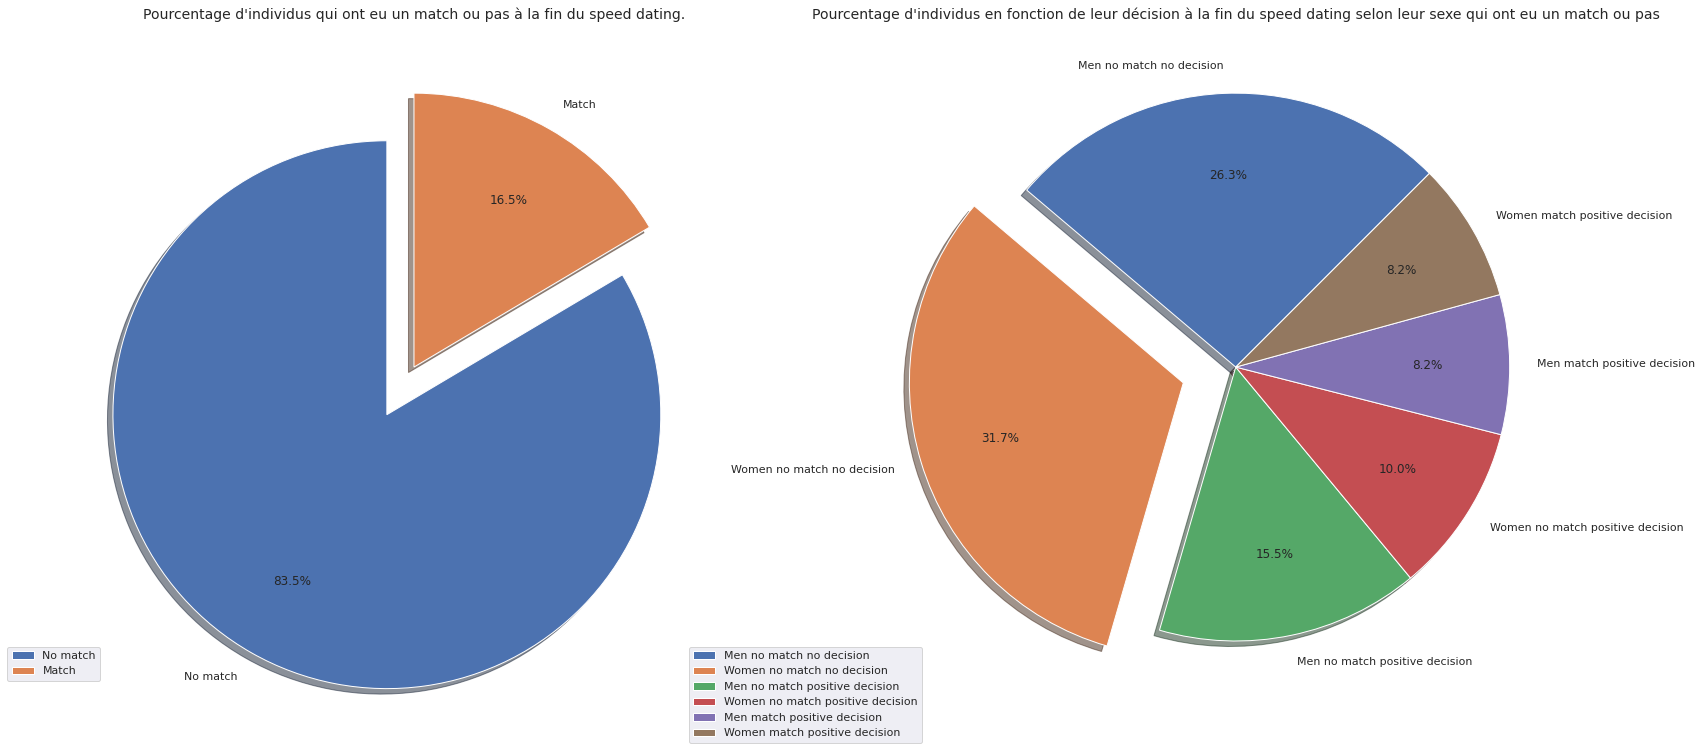

In [47]:
sns.set()

plt.figure(figsize = (27, 35))

plt.subplot(1,2,1)



labels= ["No match","Match"]

valeur = match_pourcentage
explode = (0.2,0.0)


plt.pie(valeur, labels=labels, autopct='%1.1f%%',startangle=90,explode =explode, shadow = True, pctdistance = 0.7, labeldistance = 1.1,)

plt.legend(labels,bbox_to_anchor=(0.05, 0.1))
plt.title("Pourcentage d'individus qui ont eu un match ou pas à la fin du speed dating.", size =14);




plt.subplot(1,2,2)



labels= ["Men no match no decision","Women no match no decision", "Men no match positive decision", "Women no match positive decision", "Men match positive decision", "Women match positive decision"]

valeur= data_dec_match_pourcentage
explode = (0.0,0.2,0.0,0,0.0,0.0)

plt.pie(valeur, labels=labels, autopct='%1.1f%%',startangle=45,explode =explode, shadow = True, pctdistance = 0.7, labeldistance = 1.1,)

plt.legend(labels,bbox_to_anchor=(0.05, 0.1))
plt.title("Pourcentage d'individus en fonction de leur décision à la fin du speed dating selon leur sexe qui ont eu un match ou pas", size= 14);






#### Observation

Dans notre dataset nous avons une pourcentage de match qui est faible représentée par 16.5 % de nos partcipants à ce speed dating par rapport au pourcentage d'individus qui ne match pas qui est majoritaire représenté par 83.5 %.  Parmi les individus qui participent au speed dating, nous avons majoritairement des femmes soit 31.7% des paticipantes au speed dating, qui refusent de revoir leur partenaire au second rendez-vous contre 26.3 % d'hommes. 

Alors qu'il y a plus d'hommes qui souhaitent revoir leur partenaire féminin à la fin du speed dating : soit 23.2 % des participants qui comprend = 15.5 % qui n'ont pas eu le match et 8.2 % qui ont eu le match.

Tandis que les femmes ne représentent 18.2 % des individus au speed dating qui souhaitent revoir leur partenaire homme pour un second rendez-vous, dont  10% des femmes n'ont pas eu de match et 8.2% ont eu un match.

### 2-c) Etude descriptive selon leur origine ethnique

#### Tableaux du nombre d'individu total selon l'origine ethnique chez les hommes et les femmes

In [48]:
men_race_total = speed_dating_social.race[speed_dating_social["gender"]==1].value_counts().sort_index()
men_race_total.drop("No reponse", inplace =True) 
men_race_total

Asian/Pacific Islander/Asian-American     937
Black/African American                    179
European/Caucasian-American              2520
Latino/Hispanic American                  261
Other                                     277
Name: race, dtype: int64

In [49]:
women_race_total = speed_dating_social.race[speed_dating_social["gender"]==0].value_counts().sort_index()
women_race_total.drop("No reponse", inplace =True)
women_race_total

Asian/Pacific Islander/Asian-American    1045
Black/African American                    241
European/Caucasian-American              2207
Latino/Hispanic American                  403
Other                                     245
Name: race, dtype: int64

#### Tableaux du nombre d'hommes et de femmes qui ont pris une décision positive et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [50]:
men_women_no_match_positive_decision_race = pd.pivot_table(speed_dating_social_no_match, values=['dec'], index='gender',columns = "race", aggfunc=np.sum).sort_index(ascending = False)


men_women_no_match_positive_decision_race

# gender = 1 : c'est les hommes
# gender = 0: c'est les femmes

dec                         \
race   Asian/Pacific Islander/Asian-American Black/African American   
gender                                                                
1                                        364                     65   
0                                        283                     63   

                                                                              
race   European/Caucasian-American Latino/Hispanic American No reponse Other  
gender                                                                        
1                              682                       74          2   112  
0                              373                       72          4    44

In [51]:
men_no_match_positive_decision_race =np.delete(men_women_no_match_positive_decision_race.loc[1].values,4)
men_no_match_positive_decision_race

array([364,  65, 682,  74, 112])

In [52]:
women_no_match_positive_decision_race =np.delete(men_women_no_match_positive_decision_race.loc[0].values,4)
women_no_match_positive_decision_race

array([283,  63, 373,  72,  44])

#### Tableaux du nombre d'hommes et de femmes qui ont pris une décision positive et qui ont eu un match à la fin du speed dating selon leurs origines ethniques

In [53]:
men_women_match_positive_decision_race = pd.pivot_table(speed_dating_social_match, values=['dec'], index='gender',columns = "race", aggfunc=np.sum).sort_index(ascending = False)
men_women_match_positive_decision_race = pd.concat([men_women_match_positive_decision_race.iloc[:,0:4],men_women_match_positive_decision_race.iloc[:,5]], axis = 1)
men_women_match_positive_decision_race

dec                         \
race   Asian/Pacific Islander/Asian-American Black/African American   
gender                                                                
1                                        107                     33   
0                                        160                     52   

                                                                   
race   European/Caucasian-American Latino/Hispanic American Other  
gender                                                             
1                              449                       45    51  
0                              339                       78    52

In [54]:
men_match_positive_decision_race=men_women_match_positive_decision_race.loc[1].values
men_match_positive_decision_race

array([107,  33, 449,  45,  51])

In [55]:
women_match_positive_decision_race=men_women_match_positive_decision_race.loc[0].values
women_match_positive_decision_race

array([160,  52, 339,  78,  52])

In [56]:
print(men_no_match_positive_decision_race)
print(men_match_positive_decision_race)
print(men_race_total)

[364  65 682  74 112]
[107  33 449  45  51]
Asian/Pacific Islander/Asian-American     937
Black/African American                    179
European/Caucasian-American              2520
Latino/Hispanic American                  261
Other                                     277
Name: race, dtype: int64


#### Tableaux du nombre d'hommes et de femmes qui ont pris une décision négative et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [57]:
men_no_match_negative_decision_race = men_race_total - men_no_match_positive_decision_race - men_match_positive_decision_race
men_no_match_negative_decision_race

Asian/Pacific Islander/Asian-American     466
Black/African American                     81
European/Caucasian-American              1389
Latino/Hispanic American                  142
Other                                     114
Name: race, dtype: int64

In [58]:
women_no_match_negative_decision_race = women_race_total - women_no_match_positive_decision_race - women_match_positive_decision_race
women_no_match_negative_decision_race

Asian/Pacific Islander/Asian-American     602
Black/African American                    126
European/Caucasian-American              1495
Latino/Hispanic American                  253
Other                                     149
Name: race, dtype: int64

#### Tableaux de pourcentage d'individus selon leur origine ethnique en fonction de leur décision et du match ou pas à la fin du speed dating

#### Cas des hommes

#### Tableau de pourcentage d'hommes qui ont pris une décision négative et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [59]:
pourcentage_men_no_match_negative_decision_race= np.around(men_no_match_negative_decision_race/ men_race_total *100,2)


In [60]:
pourcentage_men_no_match_negative_decision_race

Asian/Pacific Islander/Asian-American    49.73
Black/African American                   45.25
European/Caucasian-American              55.12
Latino/Hispanic American                 54.41
Other                                    41.16
Name: race, dtype: float64

#### Tableau de pourcentage d'hommes qui ont pris une décision positive et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [61]:
pourcentage_men_no_match_positive_decision_race = np.around(men_no_match_positive_decision_race/men_race_total*100,2)
pourcentage_men_no_match_positive_decision_race


Asian/Pacific Islander/Asian-American    38.85
Black/African American                   36.31
European/Caucasian-American              27.06
Latino/Hispanic American                 28.35
Other                                    40.43
Name: race, dtype: float64

#### Tableau de pourcentage d'hommes qui ont pris une décision positive et qui ont eu le match à la fin du speed dating selon leurs origines ethniques

In [62]:
pourcentage_men_match_positive_decision_race = np.around(men_match_positive_decision_race/men_race_total*100,2)

pourcentage_men_match_positive_decision_race

Asian/Pacific Islander/Asian-American    11.42
Black/African American                   18.44
European/Caucasian-American              17.82
Latino/Hispanic American                 17.24
Other                                    18.41
Name: race, dtype: float64

#### Cas des femmes

#### Tableau de pourcentage de femmes qui ont pris une décision négative et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [63]:
pourcentage_women_no_match_negative_decision_race= np.around(women_no_match_negative_decision_race/ women_race_total *100,2)
pourcentage_women_no_match_negative_decision_race

Asian/Pacific Islander/Asian-American    57.61
Black/African American                   52.28
European/Caucasian-American              67.74
Latino/Hispanic American                 62.78
Other                                    60.82
Name: race, dtype: float64

#### Tableau de pourcentage de femmes qui ont pris une décision positive et qui n'ont pas eu de match à la fin du speed dating selon leurs origines ethniques

In [64]:
pourcentage_women_no_match_positive_decision_race = np.around(women_no_match_positive_decision_race/women_race_total*100,2)

pourcentage_women_no_match_positive_decision_race

Asian/Pacific Islander/Asian-American    27.08
Black/African American                   26.14
European/Caucasian-American              16.90
Latino/Hispanic American                 17.87
Other                                    17.96
Name: race, dtype: float64

#### Tableau de pourcentage de femmes qui ont pris une décision positive et qui ont eu le match à la fin du speed dating selon leurs origines ethniques

In [65]:
pourcentage_women_match_positive_decision_race = np.around(women_match_positive_decision_race/women_race_total*100,2)
pourcentage_women_match_positive_decision_race

Asian/Pacific Islander/Asian-American    15.31
Black/African American                   21.58
European/Caucasian-American              15.36
Latino/Hispanic American                 19.35
Other                                    21.22
Name: race, dtype: float64

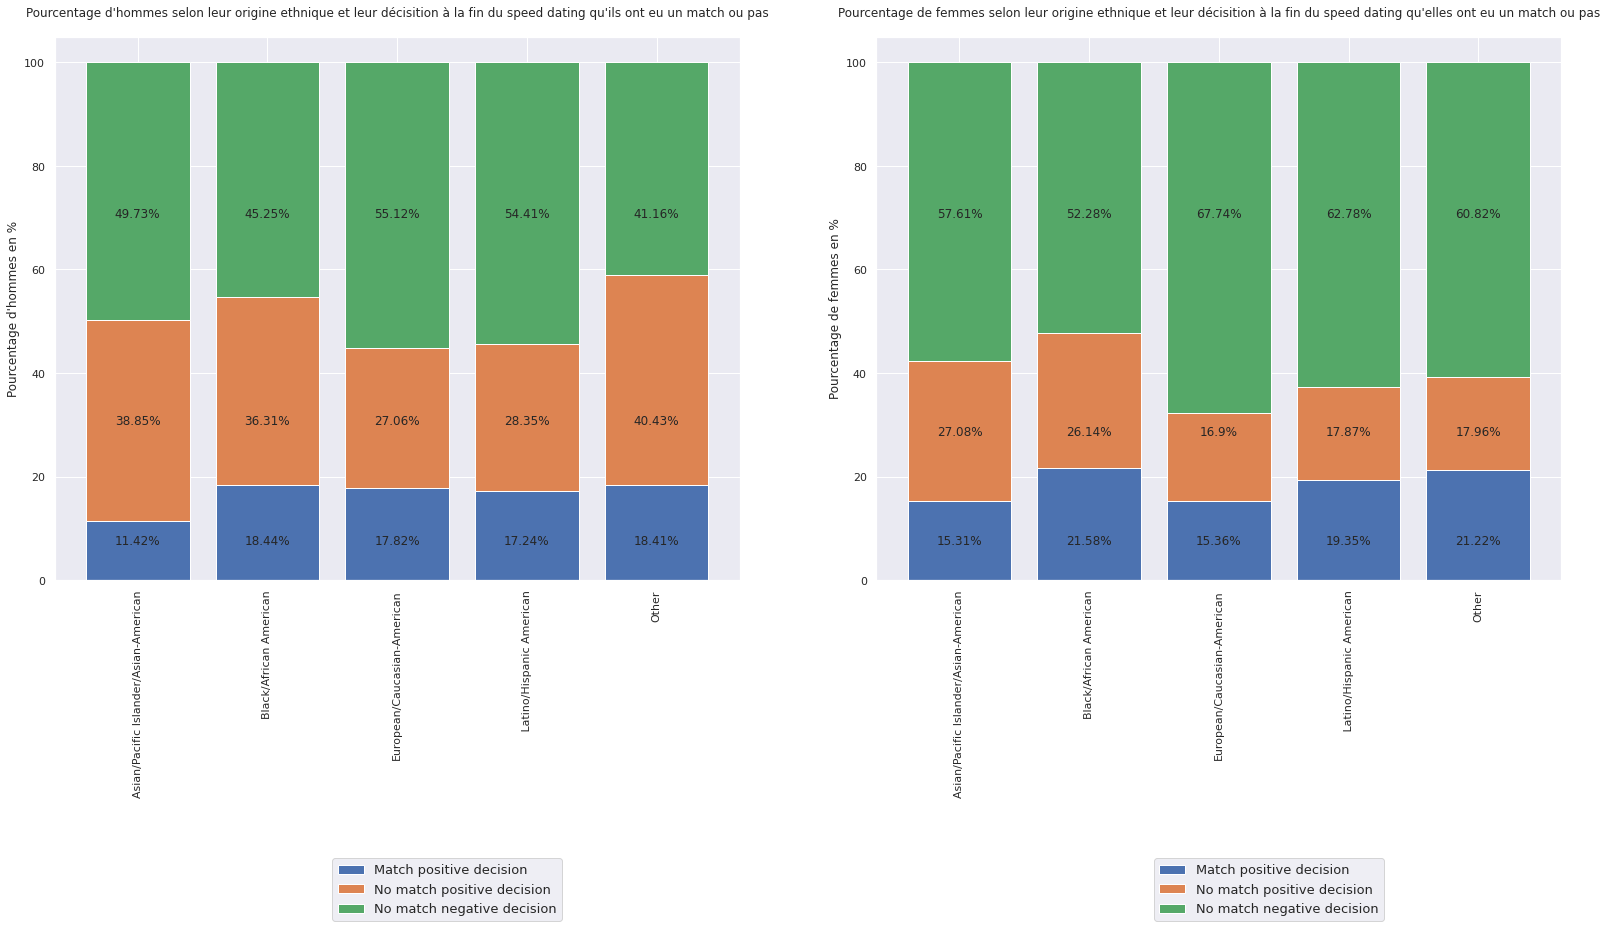

In [66]:
sns.set()

plt.figure(figsize = (27, 10))

plt.subplot(1,2,1)

data1= pourcentage_men_no_match_negative_decision_race
data2= pourcentage_men_no_match_positive_decision_race
data3= pourcentage_men_match_positive_decision_race

labels=["Asian/Pacific Islander/Asian-American","Black/African American","European/Caucasian-American"," Latino/Hispanic American","Other"]


plt.bar(labels,data3,label="Match positive decision")
plt.bar(labels,data2,bottom=np.array(data3),label="No match positive decision")
plt.bar(labels,data1,bottom=np.array(data3)+np.array(data2),label="No match negative decision")

for i in np.arange(len(labels)): 
    plt.text(i, 70, f"{pourcentage_men_no_match_negative_decision_race[i]}%",horizontalalignment='center')
    plt.text(i, 30, f"{pourcentage_men_no_match_positive_decision_race[i]}%", horizontalalignment= 'center')
    plt.text(i, 7, f"{pourcentage_men_match_positive_decision_race[i]}%", horizontalalignment= 'center')

plt.title("Pourcentage d'hommes selon leur origine ethnique et leur décisition à la fin du speed dating qu'ils ont eu un match ou pas",size = 12, pad = 20)
plt.xticks(rotation =90)
plt.ylabel("Pourcentage d'hommes en %")
plt.legend(bbox_to_anchor=(0.75, -0.5),fontsize=13)


plt.subplot(1,2,2)

data1= pourcentage_women_no_match_negative_decision_race 
data2= pourcentage_women_no_match_positive_decision_race
data3= pourcentage_women_match_positive_decision_race

labels=["Asian/Pacific Islander/Asian-American","Black/African American","European/Caucasian-American"," Latino/Hispanic American","Other"]


plt.bar(labels,data3,label="Match positive decision")
plt.bar(labels,data2,bottom=np.array(data3),label="No match positive decision")
plt.bar(labels,data1,bottom=np.array(data3)+np.array(data2),label="No match negative decision")


for i in np.arange(len(labels)): 
    plt.text(i, 70, f"{pourcentage_women_no_match_negative_decision_race[i]}%",horizontalalignment='center')
    plt.text(i, 28, f"{pourcentage_women_no_match_positive_decision_race[i]}%", horizontalalignment= 'center')
    plt.text(i, 7, f"{pourcentage_women_match_positive_decision_race[i]}%", horizontalalignment= 'center')


plt.title("Pourcentage de femmes selon leur origine ethnique et leur décisition à la fin du speed dating qu'elles ont eu un match ou pas",size = 12, pad = 20)
plt.xticks(rotation =90);
plt.ylabel("Pourcentage de femmes en %")
plt.legend(bbox_to_anchor=(0.75, -0.5),fontsize=13);



#### Observation

Ici à gauche nous avons la pourcentage d'hommes et à droite le pourcentage de femmes selon leur origine éthnique répartie en fonction de leur décision finale à la fin du speed dating (positive ou négative) qui aboutit ou pas à un match. 

Tout d'abord chez les hommes comme chez les femmes le pourcentage de match à la fin du speed dating (en bleu) reste faible quelque soit leur origine éthnique le maximum chez les hommes est au alentour de 18.44%  et  21.58 % chez les femmes.

Mais chez les hommes, on observe, que c'est l'origine ethnique asiatique qui a le plus faible pourcentage de match (avec 11.42%) mais aussi les femmes asiatiques ont un faible pourcentage de match parmi toutes les origines éthniques (avec 15.31%) suivi de très près des femmes caucasiennes.

Par contre chez les hommes, à part les origines asiatiques les pourcentages de match restent pratiquement équivalentes, légère avance chez les origines afro alors que chez les femmes, les origine ethniques afro dominent par rapport aux autres origines ethniques connues (avec 21.58%). 

Par ailleurs, chez les hommes comme chez les femmes, c'est l'origine ethnique afro qui sont plus favorables à un second rendez-vous avec le partenaire à la fin du speed dating quelque soit l'aboutissant qu'ils ont eu un match ou ne match pas parmi les origines ethniques connues. (homme : 36.31+18.44 = 54.75%, femme: 26.14+21.58 = 47.72% ).



### 2-d) Etude de la pourcentage de match en fonction du "samerace" (rencontre de deux individus à la même origine ethnique) chez chaque origine ethnique

#### Tableau du nombre total d'individus ayant rencontré un partenaire de la même origine ethnique chez chaque origine ethnique

In [67]:
total_samerace = speed_dating_social[speed_dating_social.samerace==1].race.value_counts().sort_index()
total_samerace

Asian/Pacific Islander/Asian-American     480
Black/African American                     18
European/Caucasian-American              2724
Latino/Hispanic American                   52
Other                                      42
Name: race, dtype: int64

#### Tableau du pourcentage d'individus ayant eu un match et rencontré un partenaire de la même origine ethnique chez chaque origine ethnique

In [68]:
pourcentage_samerace_match = round((speed_dating_social[(speed_dating_social.samerace==1)&(speed_dating_social.match == 1)].race.value_counts().sort_index())/(total_samerace)*100,2)
pourcentage_samerace_match

Asian/Pacific Islander/Asian-American    12.92
Black/African American                   55.56
European/Caucasian-American              17.55
Latino/Hispanic American                 23.08
Other                                     9.52
Name: race, dtype: float64

#### Tableau du pourcentage d'individus n'ayant pas eu un match mais qui ont rencontré un partenaire de la même origine ethnique chez chaque origine ethnique

In [69]:
pourcentage_samerace_no_match=round((speed_dating_social[(speed_dating_social.samerace==1)&(speed_dating_social.match == 0)].race.value_counts().sort_index())/(total_samerace)*100,2)
pourcentage_samerace_no_match

Asian/Pacific Islander/Asian-American    87.08
Black/African American                   44.44
European/Caucasian-American              82.45
Latino/Hispanic American                 76.92
Other                                    90.48
Name: race, dtype: float64

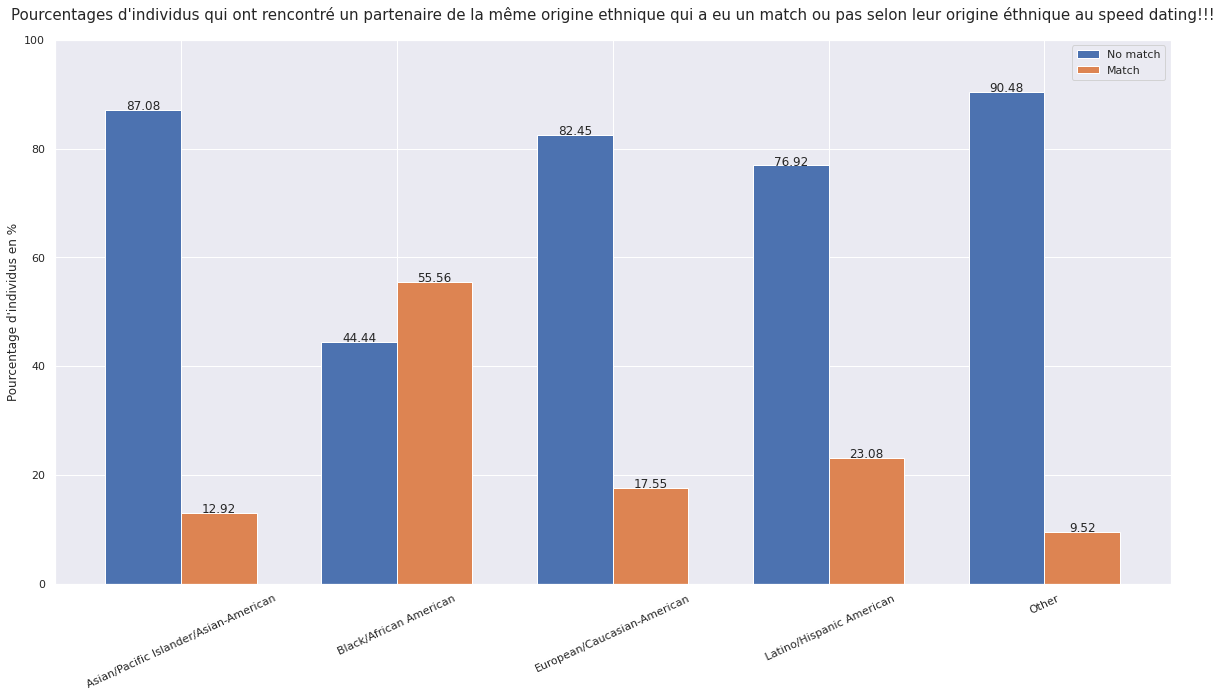

In [70]:
sns.set()

plt.figure(figsize = (20, 10))



names = ["Asian/Pacific Islander/Asian-American","Black/African American","European/Caucasian-American"," Latino/Hispanic American","Other"]

barwidth = 0.35

no_match1 = pourcentage_samerace_no_match
match1 = pourcentage_samerace_match
x = np.arange(len(names))


plt.bar(x - barwidth/2, no_match1,width = 0.35 )
plt.bar(x + barwidth/2,match1, width = 0.35 )

for i in np.arange(len(names)): 
    plt.text(i - barwidth/2, no_match1[i]+0.02, no_match1[i],horizontalalignment='center')
    plt.text(i + barwidth/2, match1[i]+0.02 ,match1[i],horizontalalignment='center')

plt.xticks(x, names, rotation = 25)
plt.ylim(0,100)

plt.legend(["No match","Match"])
plt.title("Pourcentages d'individus qui ont rencontré un partenaire de la même origine ethnique qui a eu un match ou pas selon leur origine éthnique au speed dating!!!", size = 15, pad = 20)
plt.ylabel("Pourcentage d'individus en %");




#### Observation 

On peut observer chez la plupart des origines ethniques (asiatique, caucasien, latino ou autres), malgré que les individus rencontrent un partenaire de la même origine,une grande majorité ne match pas (avec un pourcentage de 80% à 90 % pour la catégorie no match) contre un pourcentage de 10 à 20 % pour ceux qui match.

Sauf l'origine ethnique afro a un pourcentage d'individus qui match majoritairement avec 55,56% contre 44.44 % qui ne match pas avec un partenaire de la même origine.

En conclusion, l'origine ethnique ne semble pas avoir une influence dans la plupart des cas sur l'aboutissement d'un match lors speed dating sauf pour l'origine afro près de 55%  de chance de réaliser un match selon cette dataset.

### 2-e) Etude de la fréquence des sorties des individus selon leur origine ethnique

#### Tableaux du groupe asiatique qui match ou pas selon la fréquence de sorties

In [71]:
match_go_asia = np.around((speed_dating_social_match.go_out_2[speed_dating_social_match["race"] == "Asian/Pacific Islander/Asian-American"].value_counts(dropna = False, normalize=True)*100),2)
match_go_asia = match_go_asia.sort_index()
match_go_asia

medium outing (by month)          12.73
very frequent outing (by week)    85.77
very little outing                 1.50
Name: go_out_2, dtype: float64

In [72]:
no_match_go_asia = np.around((speed_dating_social_no_match.go_out_2[speed_dating_social_no_match["race"] == "Asian/Pacific Islander/Asian-American"].value_counts(dropna = False, normalize=True)*100),2)
no_match_go_asia= no_match_go_asia.sort_index()
no_match_go_asia

medium outing (by month)          11.55
very frequent outing (by week)    84.96
very little outing                 3.50
Name: go_out_2, dtype: float64

#### Tableaux du groupe afro qui match ou pas selon la fréquence de sorties

In [73]:
match_go_black = np.around((speed_dating_social_match.go_out_2[speed_dating_social_match["race"] == "Black/African American"].value_counts(dropna = False, normalize=True)*100),2)
match_go_black.loc["very little outing"] = 0
match_go_black=match_go_black.sort_index()
match_go_black

medium outing (by month)          16.47
very frequent outing (by week)    83.53
very little outing                 0.00
Name: go_out_2, dtype: float64

In [74]:
no_match_go_black = np.around((speed_dating_social_no_match.go_out_2[speed_dating_social_no_match["race"] == "Black/African American"].value_counts(dropna = False, normalize=True)*100),2)
no_match_go_black.loc["very little outing"] = 0

no_match_go_black= no_match_go_black.sort_index()
no_match_go_black

medium outing (by month)          20.0
very frequent outing (by week)    80.0
very little outing                 0.0
Name: go_out_2, dtype: float64

#### Tableaux du groupe caucasien qui match ou pas selon la fréquence de sorties

In [75]:
match_go_euro = np.around((speed_dating_social_match.go_out_2[speed_dating_social_match["race"] == "European/Caucasian-American"].value_counts(dropna = False, normalize=True)*100),2)
match_go_euro.drop("No reponse", inplace =True)
match_go_euro= match_go_euro.sort_index()
match_go_euro

medium outing (by month)           3.30
very frequent outing (by week)    96.32
very little outing                 0.25
Name: go_out_2, dtype: float64

In [76]:
no_match_go_euro = np.around((speed_dating_social_no_match.go_out_2[speed_dating_social_no_match["race"] == "European/Caucasian-American"].value_counts(dropna = False, normalize=True)*100),2)
no_match_go_euro.drop("No reponse", inplace =True)
no_match_go_euro= no_match_go_euro.sort_index()
no_match_go_euro 

medium outing (by month)           6.17
very frequent outing (by week)    92.76
very little outing                 0.69
Name: go_out_2, dtype: float64

#### Tableaux du groupe latino qui match ou pas selon la fréquence de sorties

In [77]:
match_go_latino = np.around((speed_dating_social_match.go_out_2[speed_dating_social_match["race"] == "Latino/Hispanic American"].value_counts(dropna = False, normalize=True)*100),2)
match_go_latino.loc["very little outing"] = 0

match_go_latino= match_go_latino.sort_index()
match_go_latino

medium outing (by month)           1.63
very frequent outing (by week)    98.37
very little outing                 0.00
Name: go_out_2, dtype: float64

In [78]:
no_match_go_latino = np.around((speed_dating_social_no_match.go_out_2[speed_dating_social_no_match["race"] == "Latino/Hispanic American"].value_counts(dropna = False, normalize=True)*100),2)
no_match_go_latino .loc["very little outing"] = 0
no_match_go_latino= no_match_go_latino.sort_index()
no_match_go_latino

medium outing (by month)           4.44
very frequent outing (by week)    95.56
very little outing                 0.00
Name: go_out_2, dtype: float64

#### Représentation graphique

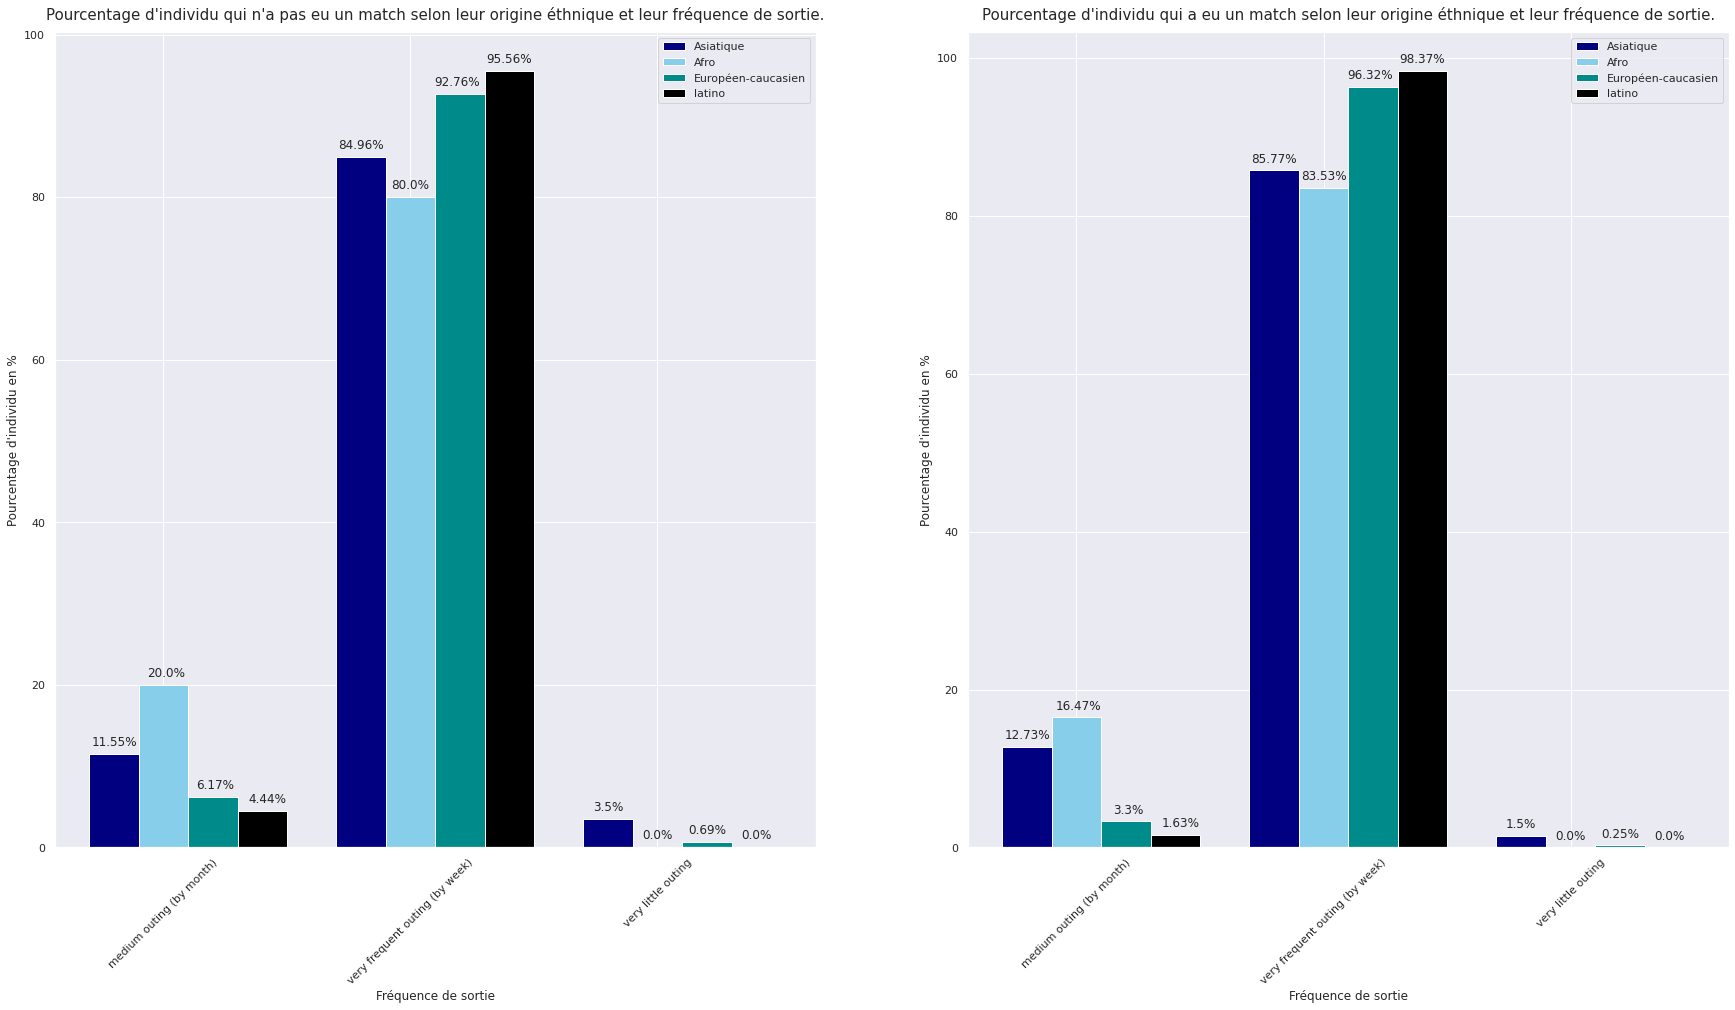

In [79]:
sns.set()

plt.figure(num=None, figsize = (30, 15))

plt.subplot(1,2,1)


from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np




t_1 = no_match_go_asia
t_2 = no_match_go_black
t_3 = no_match_go_euro
t_4 = no_match_go_latino

medium_outing=[no_match_go_asia.iloc[0],no_match_go_black.iloc[0],no_match_go_euro.iloc[0],no_match_go_latino.iloc[0]]

names= no_match_go_asia.index

y_pos=np.arange(len(names))

plt.bar(y_pos + 0, t_1,width=0.2, color = 'navy' , label='Asiatique')
plt.bar(y_pos + 0.2,t_2, width=0.2,color = 'skyblue',label = 'Afro')
plt.bar(y_pos + 0.4, t_3,width=0.2, color = 'darkcyan' , label='Européen-caucasien')
plt.bar(y_pos + 0.6, t_4,width=0.2, color = 'black' , label='latino')





plt.text(0, no_match_go_asia.iloc[0]+1 ,f"{no_match_go_asia.iloc[0]}%",horizontalalignment='center')
plt.text(0.21, no_match_go_black.iloc[0]+1 ,f"{no_match_go_black.iloc[0]}%",horizontalalignment='center')
plt.text(0.41, no_match_go_euro.iloc[0]+1 ,f"{no_match_go_euro.iloc[0]}%",horizontalalignment='center')
plt.text(0.62, no_match_go_latino.iloc[0]+1 ,f"{no_match_go_latino.iloc[0]}%",horizontalalignment='center')

plt.text(1, no_match_go_asia.iloc[1]+1,f"{no_match_go_asia.iloc[1]}%",horizontalalignment='center')
plt.text(1.2, no_match_go_black.iloc[1]+1 ,f"{no_match_go_black.iloc[1]}%",horizontalalignment='center')
plt.text(1.39, no_match_go_euro.iloc[1]+1 ,f"{no_match_go_euro.iloc[1]}%",horizontalalignment='center')
plt.text(1.6, no_match_go_latino.iloc[1]+1 ,f"{no_match_go_latino.iloc[1]}%",horizontalalignment='center')

plt.text(2, no_match_go_asia.iloc[2]+1,f"{no_match_go_asia.iloc[2]}%",horizontalalignment='center')
plt.text(2.2, no_match_go_black.iloc[2]+1 ,f"{no_match_go_black.iloc[2]}%",horizontalalignment='center')
plt.text(2.4, no_match_go_euro.iloc[2]+1 ,f"{no_match_go_euro.iloc[2]}%",horizontalalignment='center')
plt.text(2.6, no_match_go_latino.iloc[2]+1 ,f"{no_match_go_latino.iloc[2]}%",horizontalalignment='center')



plt.xticks(y_pos+0.2, names, rotation = 45)

plt.legend(('Asiatique','Afro', 'Européen-caucasien', 'latino'))
plt.ylabel("Pourcentage d'individu en %")
plt.xlabel('Fréquence de sortie')
plt.title("Pourcentage d'individu qui n'a pas eu un match selon leur origine éthnique et leur fréquence de sortie.", pad =12, size = 15)

plt.subplot(1,2,2)


t_1 = match_go_asia
t_2 = match_go_black
t_3 = match_go_euro
t_4 = match_go_latino


names= match_go_asia.index

y_pos=np.arange(len(names))
plt.bar(y_pos + 0, t_1,width=0.2, color = 'navy' , label='Asiatique')
plt.bar(y_pos + 0.2,t_2, width=0.2,color = 'skyblue',label = 'Afro')
plt.bar(y_pos + 0.4, t_3,width=0.2, color = 'darkcyan' , label='Européen-caucasien')
plt.bar(y_pos + 0.6, t_4,width=0.2, color = 'black' , label='latino')



plt.text(0, match_go_asia.iloc[0]+1 ,f"{match_go_asia.iloc[0]}%",horizontalalignment='center')
plt.text(0.21, match_go_black.iloc[0]+1 ,f"{match_go_black.iloc[0]}%",horizontalalignment='center')
plt.text(0.41, match_go_euro.iloc[0]+1 ,f"{match_go_euro.iloc[0]}%",horizontalalignment='center')
plt.text(0.62, match_go_latino.iloc[0]+1 ,f"{match_go_latino.iloc[0]}%",horizontalalignment='center')

plt.text(1, match_go_asia.iloc[1]+1,f"{match_go_asia.iloc[1]}%",horizontalalignment='center')
plt.text(1.2, match_go_black.iloc[1]+1 ,f"{match_go_black.iloc[1]}%",horizontalalignment='center')
plt.text(1.39, match_go_euro.iloc[1]+1 ,f"{match_go_euro.iloc[1]}%",horizontalalignment='center')
plt.text(1.6, match_go_latino.iloc[1]+1 ,f"{match_go_latino.iloc[1]}%",horizontalalignment='center')

plt.text(2, match_go_asia.iloc[2]+1,f"{match_go_asia.iloc[2]}%",horizontalalignment='center')
plt.text(2.2, match_go_black.iloc[2]+1 ,f"{match_go_black.iloc[2]}%",horizontalalignment='center')
plt.text(2.4, match_go_euro.iloc[2]+1 ,f"{match_go_euro.iloc[2]}%",horizontalalignment='center')
plt.text(2.6, match_go_latino.iloc[2]+1 ,f"{match_go_latino.iloc[2]}%",horizontalalignment='center')



plt.xticks(y_pos+0.2, names, rotation = 45)
#plt.yscale('log')
plt.legend(('Asiatique','Afro', 'Européen-caucasien', 'latino'))
plt.ylabel("Pourcentage d'individu en %")
plt.xlabel('Fréquence de sortie')
plt.title("Pourcentage d'individu qui a eu un match selon leur origine éthnique et leur fréquence de sortie.", pad =12, size = 15);





#### Observation

On observe quelque soit le groupe d'individu qui match ou pas, ils sortent très fréquemment au moins une fois par semaine minimun ("very frequent outing(by week)"). Mais au fur à mesure que la fréquence de sortie diminue (sortie par mois ("medium outing") ou très peu ("very little outing") le pourcentage d'individu qui ne match pas devient supérieur au pourcentage d'individu qui match pour les origine ethniques afro, caucasien et latino et pratiquement égale pour les asiatiques.

En regardant plus en détail en fonction de l'origine éthnique, on a de grande tendance. 

Ainsi, les individus d'origine latine sortent très fréquemment (au moins un fois par semaine:"very frequent outing(by week)") et domine cette catégorie suivi de très près par les individus d'origine caucasienne. 

Ensuite, ce sont les individus d'origine afro qui dominent la catégorie "sortent moyennement au moins une fois par mois: medium outing" . 

Enfin, les individus asiatiques sont en tête dans la catégorie sorte très peu(au moins une fois par an ou pratiquement pas: "very little outing").

Donc, on peut supposer que la fréquence de sortie chez les individus n'a pas un réel impact sur l'aboutissement d'un match à la fin d'un speed dating. (car il y a autant d'individus qui sortent très frequemment qui match et ne match pas.

Mais on peut constater, qu'il y a une légère influence de l'origine ethnique sur la fréquence de sortie car les personnes asiatiques ont une tendance plus casanières par rapport aux autres origines ethniques. (domine la catégorie "very little outing").

Ainsi ceci pourrait expliquer partiellement qu'ils ont moins de match à la fin du speed dating  par rapport aux autres origines ethniques. 

### 2-f) Etude lié à la différence d'âge

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



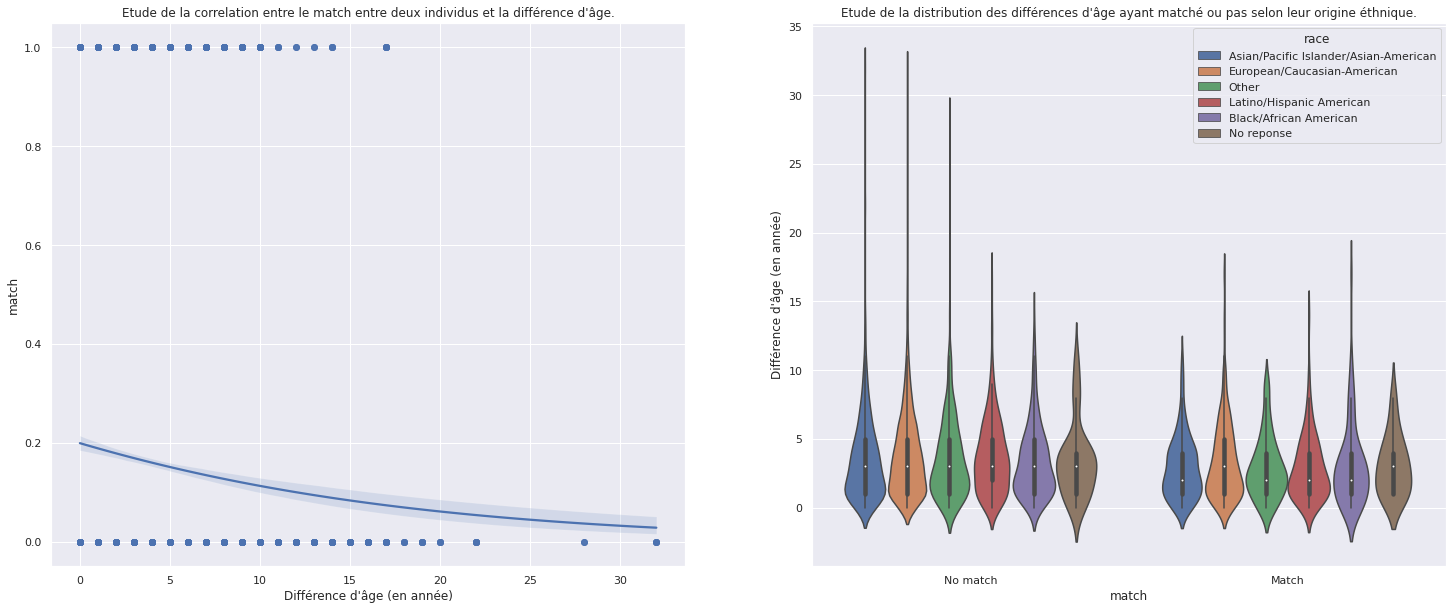

In [80]:
plt.figure(figsize = (25, 10))

plt.subplot(1,2,1)

sns.regplot(x="age_difference", y="match", data=speed_dating_social, logistic=True)
plt.title("Etude de la correlation entre le match entre deux individus et la différence d'âge."); 
plt.xlabel("Différence d'âge (en année)")
#plt.legend()


plt.subplot(1,2,2)

d_a_race= sns.violinplot(data = speed_dating_social, x = "match", y = "age_difference", hue= "race")
d_a_race.set_xticklabels(["No match","Match"])
d_a_race.set_ylabel("Différence d'âge (en année)")

d_a_race.set_title("Etude de la distribution des différences d'âge ayant matché ou pas selon leur origine éthnique.");



#### Observation

On observe quand même une corrélation logistique entre les individus qui match ou pas à la fin du speed dating et la différence d'âge. En effet, les individus qui match ont une différence d'âge plus réduite ou plus petite et plus concentré (une différence d'âge qui ne dépasse pas aux alentours de 15 ans). Alors que ceux qui ne match pas, les différences d'âge sont assez dispersées voir très grande. 

En parallèle en regardant les violins des différences d'âge selon leur origine éthnique, on a la même tendance. La différence d'âge est plus réduite, plus petite quelque soit l'origine ethnique quand il match. Mais quand il ne match pas les différences d'âges sont plus dispersées et plus grande, notemment dans le groupe asiatique qui présente la plus grande différence d'âge parmi toutes les origines ethniques.

In [81]:
age_max_asiatique = max(speed_dating_social[speed_dating_social.race =="Asian/Pacific Islander/Asian-American"].age)
age_max_asiatique

55.0

In [82]:
age_min_asiatique = min(speed_dating_social[speed_dating_social.race =="Asian/Pacific Islander/Asian-American"].age)
age_min_asiatique

18.0

### 2-f) Dataset 2 : speed_dating_quality

In [83]:
speed_dating_quality = speed_dating[attribut_qualite]
speed_dating_quality.head()

,gender,gender_2,match,match_2,race,sinc,age,age_difference,attr,intel,fun,amb,shar,like,prob,met,dec,dec_o,imprace,imprelig
2,0,Woman,1,match,Asian/Pacific Islander/Asian-American,8.0,21.0,1.0,5.0,9.0,8.0,5.0,7.0,7.0,6.0,1.0,1,1,2.0,4.0
3,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,2.0,7.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,1,1,2.0,4.0
4,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,3.0,5.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,1,1,2.0,4.0
8,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,7.0,7.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0,1,1,2.0,4.0
13,0,Woman,1,match,European/Caucasian-American,9.0,24.0,1.0,7.0,7.0,6.0,5.0,7.0,7.0,8.0,2.0,1,1,2.0,5.0


In [84]:
speed_dating_quality.columns

Index(['gender', 'gender_2', 'match', 'match_2', 'race', 'sinc', 'age',
       'age_difference', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'dec', 'dec_o', 'imprace', 'imprelig'],
      dtype='object')

### 2-g) Etude des notations des différents attributs en fonction de leur sexe

#### Tableau des attributs liés aux femmes

In [85]:
women_qual = speed_dating_quality[speed_dating_quality.gender == 0]
women_qual.head()

,gender,gender_2,match,match_2,race,sinc,age,age_difference,attr,intel,fun,amb,shar,like,prob,met,dec,dec_o,imprace,imprelig
2,0,Woman,1,match,Asian/Pacific Islander/Asian-American,8.0,21.0,1.0,5.0,9.0,8.0,5.0,7.0,7.0,6.0,1.0,1,1,2.0,4.0
3,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,2.0,7.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,1,1,2.0,4.0
4,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,3.0,5.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,1,1,2.0,4.0
8,0,Woman,1,match,Asian/Pacific Islander/Asian-American,6.0,21.0,7.0,7.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0,1,1,2.0,4.0
13,0,Woman,1,match,European/Caucasian-American,9.0,24.0,1.0,7.0,7.0,6.0,5.0,7.0,7.0,8.0,2.0,1,1,2.0,5.0


#### Tableau des attributs liés aux hommes

In [86]:
men_qual = speed_dating_quality[speed_dating_quality.gender == 1]
men_qual.head()

,gender,gender_2,match,match_2,race,sinc,age,age_difference,attr,intel,fun,amb,shar,like,prob,met,dec,dec_o,imprace,imprelig
117,1,Man,1,match,European/Caucasian-American,8.0,22.0,3.0,8.0,10.0,7.0,6.0,5.0,9.0,4.0,2.0,1,1,1.0,1.0
118,1,Man,1,match,European/Caucasian-American,8.0,22.0,4.0,8.0,10.0,7.0,6.0,5.0,8.0,4.0,2.0,1,1,1.0,1.0
120,1,Man,1,match,Asian/Pacific Islander/Asian-American,10.0,22.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1,1,3.0,5.0
127,1,Man,1,match,Asian/Pacific Islander/Asian-American,10.0,22.0,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1,1,3.0,5.0
128,1,Man,1,match,Asian/Pacific Islander/Asian-American,10.0,22.0,4.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1,1,3.0,5.0


#### Tableau des notes moyennes des attributs donnés par les femmes à leur partenaire qu'elles aient eu un match ou pas

In [87]:
women_quality1 = np.around(pd.pivot_table(women_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"], index='match', aggfunc=np.mean),2)
women_quality1

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,6.86,5.69,6.00,4.15,4.24,7.31,5.73,5.09,6.95
1,7.45,7.12,7.65,3.81,3.96,8.07,7.34,6.87,7.82


#### Tableau des notes moyennes des attributs donnés par les hommes à leur partenaire qu'ils aient eu un match ou pas

In [88]:
men_quality1 = np.around(pd.pivot_table(men_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"], index='match', aggfunc=np.mean),2)
men_quality1

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,6.53,6.24,6.30,3.53,3.11,7.17,6.04,5.27,7.13
1,7.17,7.52,7.56,3.12,3.00,7.83,7.42,6.68,7.80


#### Représentation graphique

In [89]:
import plotly.graph_objects as go

categories =['Ambitious', 'Attractive', 'fun', 'Imprace', 'Imprelig', 'Intelligent', 'Like', 'Shared Interests', 'Sincere']

fig=make_subplots(rows=1, cols=2,specs=[[{'type': 'polar'}]*2],

                  subplot_titles=("Notes moyennes à chaque attribut données par les femmes à leur partenaire.",
                                 "Notes moyennes à chaque attribut données par les hommes à leur partenaire."),horizontal_spacing =(0.2),
                  vertical_spacing=(1)
                 )
fig.update_annotations(font_size=13)

fig.append_trace(go.Scatterpolar(
      r=women_quality1.iloc[1],
      theta=categories,
      fill='toself',
      name='women match'
),1,1)


fig.append_trace(go.Scatterpolar(
      r=women_quality1.iloc[0],
      theta=categories,
      fill='toself',
      name='women no match'
),1,1)


fig.append_trace(go.Scatterpolar(
      r=men_quality1.iloc[1],
      theta=categories,
      fill='toself',
      name='men match'
),1,2)
fig.append_trace(go.Scatterpolar(
      r=men_quality1.iloc[0],
      theta=categories,
      fill='toself',
      name='men no match'
),1,2)

fig.update_polars(radialaxis_range=list([0,10]))
                 
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
    height=800, width=1400,
  showlegend=True
)

fig.show()

#### Observation

On observe quelque soit le genre des individus, hommes et femmes qui ont eu un match avec leur partenaire, donnent des notes plus élevées au niveau de leurs qualités sauf pour les atributs Imprace et Imprelig qui font référence à la même origine ethnique et la même pratique religieuse. En effet, on observe qu'au niveau des ses 2 attributs que les notes sont plus faibles au alentours ( de 3), qu'il y ait eu un match ou pas avec leur partenaire quelque soit leur sexe.

Par ailleurs, les qualités amusant (Fun), aimant (Like), attirant (attractive), les intérêts partagés (Shared Interests), sont les attributs où la différence des notes entre les individus qui ont eu un match ou pas avec leur partenaire semble la plus élevée.


### 2-f) Etude des notations des différents attributs en fonction de leur origine ethnique

In [90]:
speed_dating_quality.race.value_counts()

European/Caucasian-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     522
Black/African American                    420
No reponse                                 63
Name: race, dtype: int64

#### Tableau des attributs liés origines caucasiennes

In [91]:
caucasian_qual = speed_dating_quality[speed_dating_quality.race == "European/Caucasian-American"]
caucasian_qual.head()

,gender,gender_2,match,match_2,race,sinc,age,age_difference,attr,intel,fun,amb,shar,like,prob,met,dec,dec_o,imprace,imprelig
13,0,Woman,1,match,European/Caucasian-American,9.0,24.0,1.0,7.0,7.0,6.0,5.0,7.0,7.0,8.0,2.0,1,1,2.0,5.0
18,0,Woman,1,match,European/Caucasian-American,6.0,24.0,4.0,7.0,8.0,9.0,4.0,5.0,5.0,6.0,2.0,1,1,2.0,5.0
33,0,Woman,1,match,European/Caucasian-American,10.0,23.0,0.0,8.0,7.0,10.0,7.0,10.0,8.0,10.0,1.0,1,1,1.0,1.0
38,0,Woman,1,match,European/Caucasian-American,8.0,23.0,5.0,9.0,10.0,10.0,7.0,8.0,8.0,8.0,2.0,1,1,1.0,1.0
43,0,Woman,1,match,European/Caucasian-American,5.0,21.0,2.0,8.0,5.0,7.0,7.0,9.0,8.0,2.0,1.0,1,1,8.0,1.0


#### Tableaux des attributs liés origines asiatiques, latino et afro

In [92]:
asian_qual = speed_dating_quality[speed_dating_quality.race == "Asian/Pacific Islander/Asian-American"]
latino_qual = speed_dating_quality[speed_dating_quality.race == "Latino/Hispanic American"]
afro_qual = speed_dating_quality[speed_dating_quality.race == "Black/African American"]


#### Tableau des notes moyennes des attributs données par les individus d'origines caucasiennes à leur partenaire qu'ils aient eu un match ou pas

In [93]:
caucasian_quality = np.around(pd.pivot_table(caucasian_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"],index=['match'], aggfunc=np.mean),2)
caucasian_quality

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,6.75,5.98,6.13,4.27,4.05,7.29,5.89,5.14,7.12
1,7.33,7.43,7.65,3.76,3.72,7.96,7.47,6.77,7.81


#### Tableau des notes moyennes des attributs données par les individus d'origines asiatiques à leur partenaire qu'ils aient eu un match ou pas

In [94]:
asian_quality = np.around(pd.pivot_table(asian_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"],index=['match'], aggfunc=np.mean),2)
asian_quality

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,6.51,5.94,6.17,3.47,3.10,7.07,5.85,5.21,6.95
1,7.02,6.96,7.30,3.48,3.22,7.70,7.11,6.52,7.60


#### Tableau des notes moyennes des attributs données par les individus d'origines latines à leur partenaire qu'ils aient eu un match ou pas

In [95]:
latino_quality = np.around(pd.pivot_table(latino_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"],index=['match'], aggfunc=np.mean),2)
latino_quality

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,6.45,5.49,5.68,2.79,3.48,6.90,5.39,5.01,6.32
1,7.33,7.16,7.54,2.56,2.93,7.89,7.13,6.80,7.51


#### Tableau des notes moyennes des attributs données par les individus d'origines afro à leur partenaire qu'ils aient eu un match ou pas

In [96]:
afro_quality = np.around(pd.pivot_table(afro_qual, values=['sinc', 'attr', 'intel', 'fun', 'amb', 'shar', 'like', 'imprace',"imprelig"],index=['match'], aggfunc=np.mean),2)
afro_quality

,amb,attr,fun,imprace,imprelig,intel,like,shar,sinc
match,,,,,,,,,
0,7.39,6.25,6.75,3.38,2.81,7.87,6.43,5.53,7.68
1,7.95,7.44,8.02,3.22,2.85,8.47,7.61,7.15,8.42


In [97]:
afro_quality.iloc[1]

amb         7.95
attr        7.44
fun         8.02
imprace     3.22
imprelig    2.85
intel       8.47
like        7.61
shar        7.15
sinc        8.42
Name: 1, dtype: float64

#### Représentation graphique

In [98]:
import plotly.graph_objects as go

categories =['Ambitious', 'Attractive', 'fun', 'Imprace', 'Imprelig', 'Intelligent', 'Like', 'Shared Interests', 'Sincere']

fig=make_subplots(rows=2, cols=2,specs=[[{'type': 'polar'}]*2]*2,

                  subplot_titles=("Notes moyennes à chaque attribut données par les personnes d'origine ethnique caucasienne à leur partenaire",
                                 "Notes moyennes à chaque attribut données par les personnes d'origine ethnique asiatique à leur partenaire",
                                 "Notes moyennes à chaque attribut données par les personnes d'origine ethnique latino à leur partenaire",
                                 "Notes moyennes à chaque attribut données par les personnes d'origine ethnique afro à leur partenaire")
                  
                 )
fig.update_annotations(font_size=12,borderpad=25)



fig.append_trace(go.Scatterpolar(
      r=caucasian_quality.iloc[1],
      theta=categories,
      fill='toself',
      name='European/Caucasian-American match'
),1,1)


fig.append_trace(go.Scatterpolar(
      r=caucasian_quality.iloc[0],
      theta=categories,
      fill='toself',
      name='European/Caucasian-American no match'
),1,1)


fig.append_trace(go.Scatterpolar(
      r=asian_quality.iloc[1],
      theta=categories,
      fill='toself',
      name='Asian/Pacific Islander/Asian-American match'
),1,2)
fig.append_trace(go.Scatterpolar(
      r=asian_quality.iloc[0],
      theta=categories,
      fill='toself',
      name='Asian/Pacific Islander/Asian-American no match'
),1,2)


fig.append_trace(go.Scatterpolar(
      r=latino_quality.iloc[1],
      theta=categories,
      fill='toself',
      name='Latino/Hispanic American match'
),2,1)
fig.append_trace(go.Scatterpolar(
      r=latino_quality.iloc[0],
      theta=categories,
      fill='toself',
      name='Latino/Hispanic American no match'
),2,1)


fig.append_trace(go.Scatterpolar(
      r=afro_quality.iloc[1],
      theta=categories,
      fill='toself',
      name='Black/African American match'
),2,2)
fig.append_trace(go.Scatterpolar(
      r=afro_quality.iloc[0],
      theta=categories,
      fill='toself',
      name='Black/African American no match'
),2,2)


fig.update_polars(radialaxis_range=list([0,10]))
                 
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
    height=1200, width=1800,
  showlegend=True,margin_pad=10
)

fig.show()

#### Observation 

On observe quelque soit l'origine ethnique les individus qui ont eu un match avec leur partenaire, donnent des notes plus élevées au niveau de leurs qualités sauf pour les atributs Imprace et Imprelig qui font référence à la même origine ethnique et la même pratique religieuse. En effet, on observe qu'au niveau des ses 2 attributs que les notes sont plus faibles au alentours ( 2 à 4 en moyenne 3), qu'il y ait eu un match ou pas avec leur partenaire quelque soit leur origine éthnique.

Par ailleurs, les qualités amusant (Fun), aimant (Like), attirant(e) (Attractive), les intérêts partagés (Shared Interests), sont les attributs où la différence des notes entre les individus qui ont eu un match ou pas avec leur partenaire semble la plus élevée, quelque soit l'origine ethnique.




# Conclusion finale

En conclusion, l'aboutissement à un match entre deux individus à la fin du speed dating reste un phénomène multifactoriel qui agit en même temps:
    
    
- comme l'origine etnique qui n'a pas révélé un impact direct et important sur l'aboutissement d'un match entre deux individus 

-  par contre la différence d'âge a montré une réelle influence sur l'aboutissement d'un match entre deux individus. En effet, plus l'écart d'êge est réduit, plus les deux individus ont plus de chance de se revoir à un second rendez-vous.

- le mode de vie, comme la fréquence des sorties n'a pas dévoilé une forte influence sur l'aboutissement à un match car il y a autant d'individu qui sort fréquemment qui aboutit à un match ou pas à la fin du speed dating.

- et l'influence du sexe de l'individu, entre homme et femme les attentes recherchées  pour aboutir à un match semblent similaires quelque soit l'origine ethnique. En effet, les qualités amusant (Fun), aimant (Like), attirant(e) (Attractive), les intérêts partagés (Shared Interests) sont beaucoup mieux notées quand les individus souhaitent se revoir pour un second rendez-vous par rapport à ceux qu'ils ne souhaitent pas quelque soit le sexe de l'individu et l'origine ethnique.

Cependant, les femmes ont tendance à plus refuser de revoir son partenaire à un second rendez-vous par rapport aux hommes.

Et les personnes d'origines asiatiques aboutissent moins à un match à la fin du speed-dating parmi toutes les origines ethniques. On peut supposer que les personnes d'origines asiatiques dans le speed-dating rencontrait plus souvent un partenaire avec un écart d'âge plus important, se qui n'est pas favorable à un second rendez-vous. Et il y aussi une minorité de ce groupe ethnique qui sort très peu, qui a donc une tendance casanière, pouvant conduire un comportement plus réservé par rapport à son partenaire surtout s'il rencontre pour la première fois.






